# Task5 Results: Bi-Level TSP with Depot Selection

This notebook demonstrates how to run and compare two different approaches for the **Bi-Level TSP** problem with depot selection:

1. **Nested Evolutionary Algorithm (method="nested")**:
   - Upper-level selects a pair of depots (d1, d2).
   - Lower-level solves the TSP with the constraint of stopping at depot2 after visiting 50 customers.
   
2. **Single-Level Approach (method="single")** using a Random Key encoding:
   - Encodes both depot selection and TSP route in a single chromosome.
   - Uses random key to handle the 100-customer permutation.

We will use the function `run_bilevel_tsp` from `task5_bilevel.py`.

## 1. Environment Setup

First, we import necessary libraries and ensure our module path is correct.

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

# Ensure we have access to the src/ folder
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## 2. Import the Bi-Level TSP Solver and Data

We will call `run_bilevel_tsp` with different methods.  
We also define the paths to:
- `TSP.csv` (100 customers) 
- `Depot.csv` (10 candidate depots)

In [2]:
from src.tasks.task5_bilevel import run_bilevel_tsp
tsp_file = os.path.abspath(os.path.join(module_path, "data", "TSP.csv"))
depot_file = os.path.abspath(os.path.join(module_path, "data", "Depot.csv"))

print("TSP file:", tsp_file)
print("Depot file:", depot_file)

TSP file: C:\Robbie\1 Program\1-2 COMP6707 ADVANCED COMPUTATIONAL INTELLIGENCE\COMP6707-Project\COMP6707_Project_24037513R\data\TSP.csv
Depot file: C:\Robbie\1 Program\1-2 COMP6707 ADVANCED COMPUTATIONAL INTELLIGENCE\COMP6707-Project\COMP6707_Project_24037513R\data\Depot.csv


## 3. Single Experiment: Nested Evolutionary Algorithm

Let's try a smaller upper-level population/iterations for demonstration, plus some standard parameters for the lower level.

In [3]:
nested_result = run_bilevel_tsp(
    tsp_file, 
    depot_file, 
    method="nested",
    upper_pop_size=10,   # GA pop size for depot selection
    upper_max_gen=10,    # GA generations for depot selection
    lower_pop_size=50,   # Lower-level GA pop size
    lower_max_gen=100,   # Lower-level GA generations
    seed=42
)
print("Nested EA result:", nested_result)

=== Running Nested Evolutionary Algorithm ===
Best depot pair: (Depot4, Depot8), distance = 1562.6479
Best route (first 10 customers): [ 3 46 96 99 22 26 15 29 81  2] ...

[Validation of nested] ===============================
✅ The route length is 100 (correct).
✅ The route covers all 100 customers without duplication.
✅ Depot pair (Depot4, Depot8) is valid.
First 5 customers: [ 3 46 96 99 22]
Last 5 customers: [93 71 91 27 89]
✅ After visiting the first 50, the path goes to Depot2, per compute_bilevel_cost.
Recomputed distance via compute_bilevel_cost: 1562.6479
Distance reported by algorithm: 1562.6479
✅ Distance matched (difference < 1e-6).
[End Validation of nested] ===============================

Nested EA result: {'method': 'nested', 'depot1': 4, 'depot2': 8, 'route': array([ 3, 46, 96, 99, 22, 26, 15, 29, 81,  2, 37, 45, 85, 18, 35, 17, 36,
       94, 73,  7, 58, 88, 32, 75, 57, 50,  5, 63, 39, 52, 77, 65, 54, 40,
       11, 38, 70,  0, 64, 92, 56, 84, 80, 83,  6, 78,  8, 90, 

### 3.1 Analysis of Nested Result

- We get a chosen depot pair `(4,8)` and a final route. 
- We can see the reported total distance and run the internal validation if needed (the function `run_bilevel_tsp` already does a consistency check).

In [5]:
if nested_result is not None:
    print(f"Method: {nested_result['method']}")
    print(f"Depot1: {nested_result['depot1']}, Depot2: {nested_result['depot2']}")
    print("Route (first 20 customers):", nested_result["route"][:20], "...")
    print(f"Distance: {nested_result['distance']:.4f}")

Method: nested
Depot1: 4, Depot2: 8
Route (first 20 customers): [ 3 46 96 99 22 26 15 29 81  2 37 45 85 18 35 17 36 94 73  7] ...
Distance: 1562.6479


## 4. Single-Level (Random Key) Approach

Next, let's run the single-level approach, which uses random keys to encode both depots and the TSP route in one chromosome.


=== Running Single-level (Random Key) Approach ===


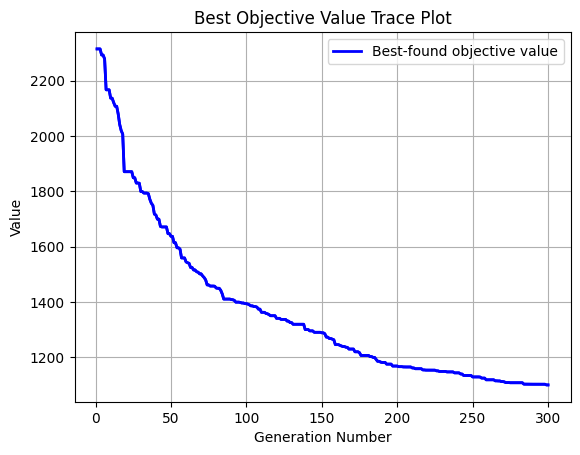

Single-level (RK) best depot pair: (Depot7, Depot8), distance = 1100.9127
Best route (first 10 customers): [80 23 47 95 43 96 52 77 37 69] ...

[Validation of single] ===============================
✅ The route length is 100 (correct).
✅ The route covers all 100 customers without duplication.
✅ Depot pair (Depot7, Depot8) is valid.
First 5 customers: [80 23 47 95 43]
Last 5 customers: [38 12  7 78 49]
✅ After visiting the first 50, the path goes to Depot2, per compute_bilevel_cost.
Recomputed distance via compute_bilevel_cost: 1100.9127
Distance reported by algorithm: 1100.9127
✅ Distance matched (difference < 1e-6).
[End Validation of single] ===============================

Single-level (RK) result: {'method': 'single', 'depot1': 7, 'depot2': 8, 'route': array([80, 23, 47, 95, 43, 96, 52, 77, 37, 69, 55, 71, 41, 70, 30, 50, 54,
       60, 90, 81, 59, 61, 82, 67,  5, 93, 86, 72, 98, 32, 33,  9, 75, 17,
       28, 51, 15, 97, 76, 63, 22, 34, 62, 21, 44, 56, 84, 14, 45,  8, 85,
       6

In [6]:
single_result = run_bilevel_tsp(
    tsp_file, 
    depot_file,
    method="single",
    single_pop_size=100,
    single_max_gen=300,
    seed=42
)
print("Single-level (RK) result:", single_result)

### 4.1 Analysis of Single-Level Result

Again, we can examine the selected depots and route.

In [7]:
if single_result is not None:
    print(f"Method: {single_result['method']}")
    print(f"Depot1: {single_result['depot1']}, Depot2: {single_result['depot2']}")
    print("Route (first 20 customers):", single_result["route"][:20], "...")
    print(f"Distance: {single_result['distance']:.4f}")

Method: single
Depot1: 7, Depot2: 8
Route (first 20 customers): [80 23 47 95 43 96 52 77 37 69 55 71 41 70 30 50 54 60 90 81] ...
Distance: 1100.9127


## 5. Visualizing Depot Selection and Routes

For demonstration, let's just do a naive route plot for the single-level approach's solution. We'll treat the route as if it visits 0..99 in the order given, with manual insertion of the depots. 

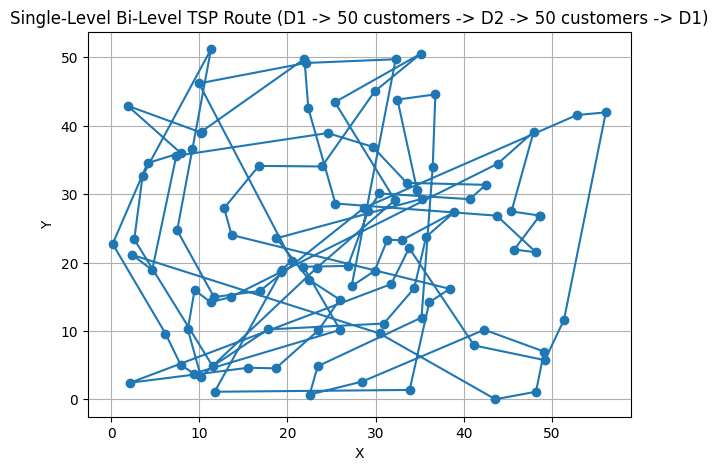

In [8]:
from src.utils.visualization import plot_tsp_route
from src.utils.data_loader import load_tsp_data, load_depot_data

# We'll do this for the single-level result
if single_result is not None:
    # The route is 100 customers
    route_sl = single_result["route"]
    d1_idx = single_result["depot1"]
    d2_idx = single_result["depot2"]
    
    # Load original coordinates
    coords_cust = load_tsp_data(tsp_file)["coords"]
    coords_depots = load_depot_data(depot_file)["coords"]
    
    # Manually construct a path of length 102: 
    #   start at depot1 -> first 50 customers -> depot2 -> next 50 customers -> depot1
    full_path = []
    full_coord_list = []
    
    # 1) depot1
    full_path.append(-1)  # marker for depot1
    full_coord_list.append(coords_depots[d1_idx])
    # 2) first 50 customers
    for i in range(50):
        c_idx = route_sl[i]
        full_path.append(c_idx)
        full_coord_list.append(coords_cust[c_idx])
    # 3) depot2
    full_path.append(-2)  # marker for depot2
    full_coord_list.append(coords_depots[d2_idx])
    # 4) next 50 customers
    for i in range(50, 100):
        c_idx = route_sl[i]
        full_path.append(c_idx)
        full_coord_list.append(coords_cust[c_idx])
    # 5) back to depot1
    full_path.append(-1)
    full_coord_list.append(coords_depots[d1_idx])
    
    # Convert to a np.array of coords
    route_coords = np.array(full_coord_list)
    
    # Let's do a simple plot. We'll directly use matplotlib.
    import matplotlib.pyplot as plt
    plt.figure(figsize=(7,5))
    plt.plot(route_coords[:,0], route_coords[:,1], marker='o', linestyle='-')
    plt.title("Single-Level Bi-Level TSP Route (D1 -> 50 customers -> D2 -> 50 customers -> D1)")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.show()

## 6. Parameter Exploration

We could try different populations and generations for both "nested" and "single" to see if one approach typically yields a better solution. For instance:

- For nested:
  - `upper_pop_size` in [10, 20], `upper_max_gen` in [10, 30], etc.
- For single:
  - `single_pop_size` in [100, 200], `single_max_gen` in [300, 500], etc.

We'll do a small demonstration comparing two sets of parameters for each approach.



Method=nested, upper_pop_size=5, upper_max_gen=10
=== Running Nested Evolutionary Algorithm ===
Best depot pair: (Depot9, Depot3), distance = 1626.5601
Best route (first 10 customers): [96 52 51 50  4 30 26 12 33 85] ...

[Validation of nested] ===============================
✅ The route length is 100 (correct).
✅ The route covers all 100 customers without duplication.
✅ Depot pair (Depot9, Depot3) is valid.
First 5 customers: [96 52 51 50  4]
Last 5 customers: [78 58 55 41 84]
✅ After visiting the first 50, the path goes to Depot2, per compute_bilevel_cost.
Recomputed distance via compute_bilevel_cost: 1626.5601
Distance reported by algorithm: 1626.5601
✅ Distance matched (difference < 1e-6).
[End Validation of nested] ===============================


Method=nested, upper_pop_size=5, upper_max_gen=20
=== Running Nested Evolutionary Algorithm ===
Best depot pair: (Depot9, Depot3), distance = 1626.5601
Best route (first 10 customers): [96 52 51 50  4 30 26 12 33 85] ...

[Validation o

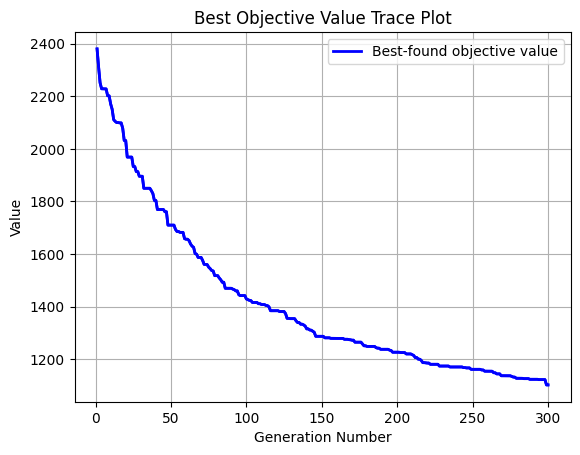

Single-level (RK) best depot pair: (Depot9, Depot2), distance = 1101.9794
Best route (first 10 customers): [14 60 90 28 39 26 52 42 37 18] ...

[Validation of single] ===============================
✅ The route length is 100 (correct).
✅ The route covers all 100 customers without duplication.
✅ Depot pair (Depot9, Depot2) is valid.
First 5 customers: [14 60 90 28 39]
Last 5 customers: [45 73 36  8 83]
✅ After visiting the first 50, the path goes to Depot2, per compute_bilevel_cost.
Recomputed distance via compute_bilevel_cost: 1101.9794
Distance reported by algorithm: 1101.9794
✅ Distance matched (difference < 1e-6).
[End Validation of single] ===============================


Method=single, single_pop_size=100, single_max_gen=500
=== Running Single-level (Random Key) Approach ===


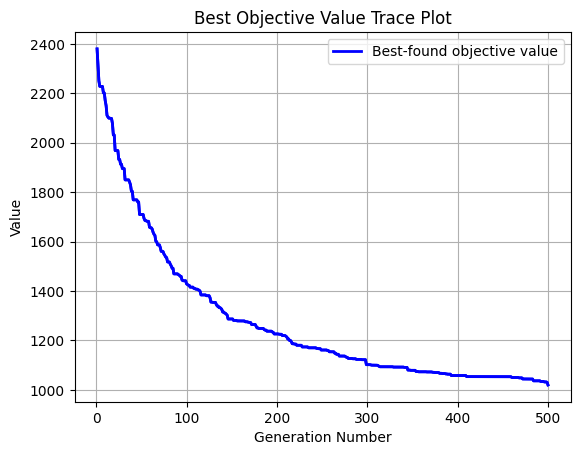

Single-level (RK) best depot pair: (Depot9, Depot2), distance = 1019.9731
Best route (first 10 customers): [14 60 90 28 39 37 35 18 38 86] ...

[Validation of single] ===============================
✅ The route length is 100 (correct).
✅ The route covers all 100 customers without duplication.
✅ Depot pair (Depot9, Depot2) is valid.
First 5 customers: [14 60 90 28 39]
Last 5 customers: [94 45 36 73  8]
✅ After visiting the first 50, the path goes to Depot2, per compute_bilevel_cost.
Recomputed distance via compute_bilevel_cost: 1019.9731
Distance reported by algorithm: 1019.9731
✅ Distance matched (difference < 1e-6).
[End Validation of single] ===============================


Method=single, single_pop_size=200, single_max_gen=300
=== Running Single-level (Random Key) Approach ===


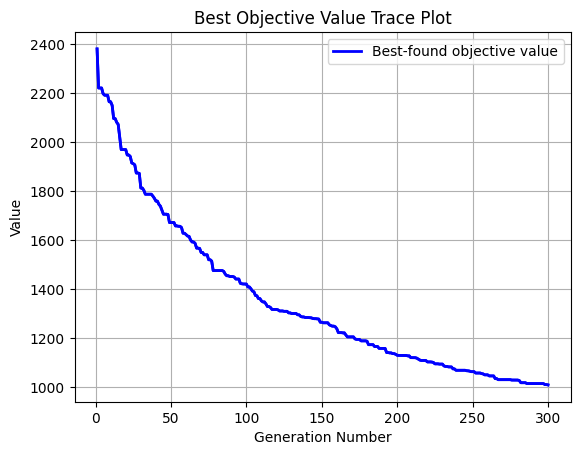

Single-level (RK) best depot pair: (Depot0, Depot8), distance = 1009.0384
Best route (first 10 customers): [74 39 36 78 49  7  9 75 60 90] ...

[Validation of single] ===============================
✅ The route length is 100 (correct).
✅ The route covers all 100 customers without duplication.
✅ Depot pair (Depot0, Depot8) is valid.
First 5 customers: [74 39 36 78 49]
Last 5 customers: [79 69  2 87 10]
✅ After visiting the first 50, the path goes to Depot2, per compute_bilevel_cost.
Recomputed distance via compute_bilevel_cost: 1009.0384
Distance reported by algorithm: 1009.0384
✅ Distance matched (difference < 1e-6).
[End Validation of single] ===============================


Method=single, single_pop_size=200, single_max_gen=500
=== Running Single-level (Random Key) Approach ===


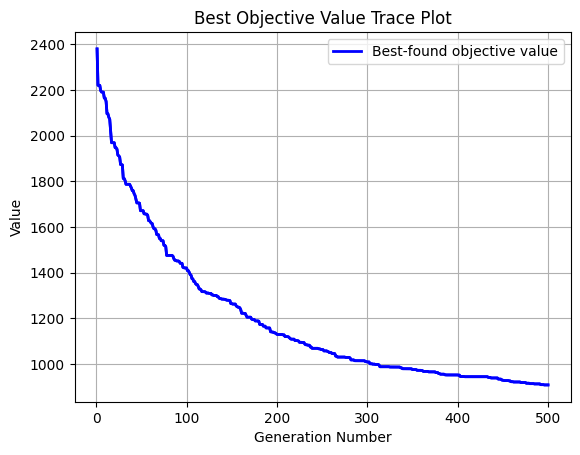

Single-level (RK) best depot pair: (Depot0, Depot8), distance = 908.5289
Best route (first 10 customers): [74 39 36 78 49  7  9 75 60 90] ...

[Validation of single] ===============================
✅ The route length is 100 (correct).
✅ The route covers all 100 customers without duplication.
✅ Depot pair (Depot0, Depot8) is valid.
First 5 customers: [74 39 36 78 49]
Last 5 customers: [79 69  2 87 10]
✅ After visiting the first 50, the path goes to Depot2, per compute_bilevel_cost.
Recomputed distance via compute_bilevel_cost: 908.5289
Distance reported by algorithm: 908.5289
✅ Distance matched (difference < 1e-6).
[End Validation of single] ===============================



In [9]:
methods = ["nested", "single"]
param_records = []

for meth in methods:
    if meth == "nested":
        for up in [5, 10]:
            for umg in [10, 20]:
                print(f"\nMethod={meth}, upper_pop_size={up}, upper_max_gen={umg}")
                res = run_bilevel_tsp(tsp_file, depot_file, 
                                      method=meth,
                                      upper_pop_size=up, 
                                      upper_max_gen=umg,
                                      lower_pop_size=50,
                                      lower_max_gen=100,
                                      seed=0)
                param_records.append({
                    "method": meth,
                    "upper_pop_size": up,
                    "upper_max_gen": umg,
                    "distance": res["distance"]
                })
    else:
        for sp in [100, 200]:
            for smg in [300, 500]:
                print(f"\nMethod={meth}, single_pop_size={sp}, single_max_gen={smg}")
                res = run_bilevel_tsp(tsp_file, depot_file,
                                      method=meth,
                                      single_pop_size=sp,
                                      single_max_gen=smg,
                                      seed=0)
                param_records.append({
                    "method": meth,
                    "single_pop_size": sp,
                    "single_max_gen": smg,
                    "distance": res["distance"]
                })


### 6.1 Summarize the Parameter Study

We can store these results in a Pandas DataFrame and compare.

In [ ]:
import pandas as pd

df_params = pd.DataFrame(param_records)
df_params

import seaborn as sns

sns.barplot(data=df_params[df_params['method'] == 'nested'],
            x='upper_pop_size',
            y='distance',
            hue='upper_max_gen')